In [38]:
# import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Import the API key.
from config import weather_api_key

#Import the datetime module from the dattetime library.
from datetime import datetime

# import the request libary
import requests

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
#Create an empty list to thold the weather date
city_data = []

#print the beginning of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

#create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
#for i in range(len(cities)):

#loop through all the cities in the list using enumerate method
for i, city in enumerate(cities):
    
    #group cities in sets fo 50 for logging purposes
    if(i%50==0 and i >= 50):
        set_count += 1
        record_count = 1
        
    #create endpoint url with each city.
    city_url = url + "&q=" + city
    print(city_url)
    #Log the url, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count.
    record_count +=1
    
#     city_weather = requests.get(city_url)
#     city_weather
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval      
------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=morgan city
Processing Record 1 of Set 1 | morgan city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=atuona
Processing Record 2 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=geraldton
Processing Record 3 of Set 1 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=butaritari
Processing Record 4 of Set 1 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=hualmay
Processing Record 5 of Set 1 | hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=meulaboh
Processing Record 6 of Set 1 | meulaboh
http://api.openweath

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=jaromerice nad rokytnou
Processing Record 4 of Set 2 | jaromerice nad rokytnou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=siavonga
Processing Record 5 of Set 2 | siavonga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=ribeira grande
Processing Record 6 of Set 2 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=itarema
Processing Record 7 of Set 2 | itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=yellowknife
Processing Record 8 of Set 2 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=rovaniemi
Processing Record 9 of Set 2 | rovaniemi
http://api.openweathermap.org/data/2.5/w

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=nurota
Processing Record 7 of Set 3 | nurota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=kathu
Processing Record 8 of Set 3 | kathu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=cayenne
Processing Record 9 of Set 3 | cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=hermanus
Processing Record 10 of Set 3 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=tutoia
Processing Record 11 of Set 3 | tutoia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=fairlie
Processing Record 12 of Set 3 | fairlie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=

Processing Record 10 of Set 4 | jujuy
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=urusha
Processing Record 11 of Set 4 | urusha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=shellbrook
Processing Record 12 of Set 4 | shellbrook
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=santa cecilia
Processing Record 13 of Set 4 | santa cecilia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=polis
Processing Record 14 of Set 4 | polis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=eusebio ayala
Processing Record 15 of Set 4 | eusebio ayala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=esperance
Processing Record 16 of Set 4 | esperance


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=ancud
Processing Record 14 of Set 5 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=beringovskiy
Processing Record 15 of Set 5 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=san quintin
Processing Record 16 of Set 5 | san quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=jawhar
Processing Record 17 of Set 5 | jawhar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=ilulissat
Processing Record 18 of Set 5 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=port macquarie
Processing Record 19 of Set 5 | port macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=hithadhoo
Processing Record 17 of Set 6 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=ferkessedougou
Processing Record 18 of Set 6 | ferkessedougou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=aykhal
Processing Record 19 of Set 6 | aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=provideniya
Processing Record 20 of Set 6 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=chapais
Processing Record 21 of Set 6 | chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=ibra
Processing Record 22 of Set 6 | ibra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d6706585

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=kharp
Processing Record 19 of Set 7 | kharp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=ambilobe
Processing Record 20 of Set 7 | ambilobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=tiznit
Processing Record 21 of Set 7 | tiznit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=kununurra
Processing Record 22 of Set 7 | kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=souillac
Processing Record 23 of Set 7 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=huron
Processing Record 24 of Set 7 | huron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=katangli
Processing Record 22 of Set 8 | katangli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=aswan
Processing Record 23 of Set 8 | aswan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=slyudyanka
Processing Record 24 of Set 8 | slyudyanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=chifeng
Processing Record 25 of Set 8 | chifeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=imeni zhelyabova
Processing Record 26 of Set 8 | imeni zhelyabova
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=taganak
Processing Record 27 of Set 8 | taganak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d670

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=arman
Processing Record 26 of Set 9 | arman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=trofors
Processing Record 27 of Set 9 | trofors
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=nizhneyansk
Processing Record 28 of Set 9 | nizhneyansk
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=hirara
Processing Record 29 of Set 9 | hirara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=upernavik
Processing Record 30 of Set 9 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=tarko-sale
Processing Record 31 of Set 9 | tarko-sale
http://api.openweathermap.org/data/2.5/weather?units=I

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=yanan
Processing Record 29 of Set 10 | yanan
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=hof
Processing Record 30 of Set 10 | hof
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=khandyga
Processing Record 31 of Set 10 | khandyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=nsanje
Processing Record 32 of Set 10 | nsanje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=jaisalmer
Processing Record 33 of Set 10 | jaisalmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=ballina
Processing Record 34 of Set 10 | ballina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=taraz
Processing Record 32 of Set 11 | taraz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=hihifo
Processing Record 33 of Set 11 | hihifo
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=dayong
Processing Record 34 of Set 11 | dayong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=gizo
Processing Record 35 of Set 11 | gizo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=kurikka
Processing Record 36 of Set 11 | kurikka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=lodwar
Processing Record 37 of Set 11 | lodwar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d6706585

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=rosetta
Processing Record 35 of Set 12 | rosetta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=kautokeino
Processing Record 36 of Set 12 | kautokeino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=santiago del estero
Processing Record 37 of Set 12 | santiago del estero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=saint-augustin
Processing Record 38 of Set 12 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=laredo
Processing Record 39 of Set 12 | laredo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d67065850482253e8bc3652398fc2475&q=havelock
Processing Record 40 of Set 12 | havelock
http://api.openweathermap.org/data/2.5/weath

In [8]:
len(city_data)

576

In [9]:
#convert the array of dictionaries to a Pandas Dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Morgan City,29.70,-91.21,72.00,60,40,6.93,US,2020-02-23 21:51:37
1,Atuona,-9.80,-139.03,81.61,76,8,13.73,PF,2020-02-23 21:51:37
2,Geraldton,-28.77,114.60,71.60,94,0,6.04,AU,2020-02-23 21:51:37
3,Butaritari,3.07,172.79,84.88,77,76,12.91,KI,2020-02-23 21:51:38
4,Hualmay,-11.10,-77.61,80.71,53,81,8.34,PE,2020-02-23 21:47:25
5,Meulaboh,4.14,96.13,81.03,81,5,7.70,ID,2020-02-23 21:51:38
6,Vao,-22.67,167.48,78.08,75,50,12.88,NC,2020-02-23 21:51:38
7,Ushuaia,-54.80,-68.30,46.40,87,90,23.04,AR,2020-02-23 21:51:38
8,Kapaa,22.08,-159.32,79.00,69,1,8.05,US,2020-02-23 21:51:39
9,Nelson Bay,-32.72,152.15,70.00,83,90,5.82,AU,2020-02-23 21:51:39


In [10]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_datanew_df = city_data_df[new_column_order]
city_datanew_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Morgan City,US,2020-02-23 21:51:37,29.70,-91.21,72.00,60,40,6.93
1,Atuona,PF,2020-02-23 21:51:37,-9.80,-139.03,81.61,76,8,13.73
2,Geraldton,AU,2020-02-23 21:51:37,-28.77,114.60,71.60,94,0,6.04
3,Butaritari,KI,2020-02-23 21:51:38,3.07,172.79,84.88,77,76,12.91
4,Hualmay,PE,2020-02-23 21:47:25,-11.10,-77.61,80.71,53,81,8.34
5,Meulaboh,ID,2020-02-23 21:51:38,4.14,96.13,81.03,81,5,7.70
6,Vao,NC,2020-02-23 21:51:38,-22.67,167.48,78.08,75,50,12.88
7,Ushuaia,AR,2020-02-23 21:51:38,-54.80,-68.30,46.40,87,90,23.04
8,Kapaa,US,2020-02-23 21:51:39,22.08,-159.32,79.00,69,1,8.05
9,Nelson Bay,AU,2020-02-23 21:51:39,-32.72,152.15,70.00,83,90,5.82


In [11]:
#create the output file(csv)
output_data_file = "weather_data/cities.csv"
#export the city_data into a csv
city_datanew_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_datanew_df["Lat"]
max_temps = city_datanew_df["Max Temp"]
humidity = city_datanew_df["Humidity"]
cloudiness = city_datanew_df["Cloudiness"]
wind_speed = city_datanew_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/23/20'

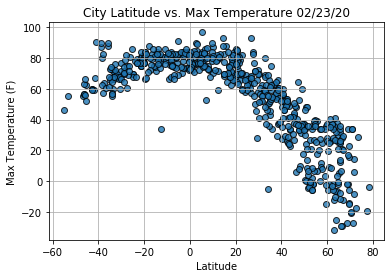

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

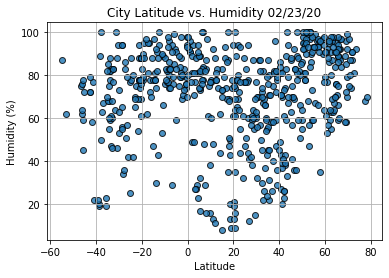

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

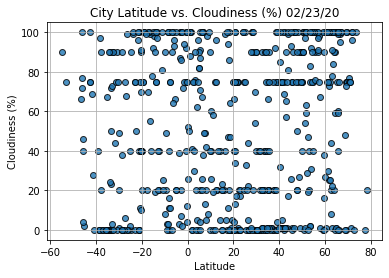

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

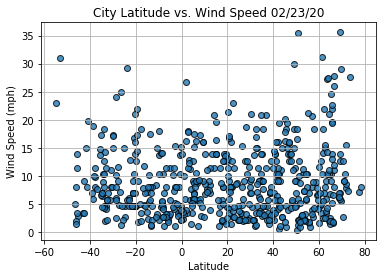

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [46]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [32]:
city_datanew_df.loc[(city_datanew_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Morgan City,US,2020-02-23 21:51:37,29.70,-91.21,72.00,60,40,6.93
3,Butaritari,KI,2020-02-23 21:51:38,3.07,172.79,84.88,77,76,12.91
5,Meulaboh,ID,2020-02-23 21:51:38,4.14,96.13,81.03,81,5,7.70
8,Kapaa,US,2020-02-23 21:51:39,22.08,-159.32,79.00,69,1,8.05
10,Alexandria,EG,2020-02-23 21:51:39,31.22,29.96,51.80,87,40,2.24


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_datanew_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_datanew_df.loc[(city_data_df["Lat"] < 0)]

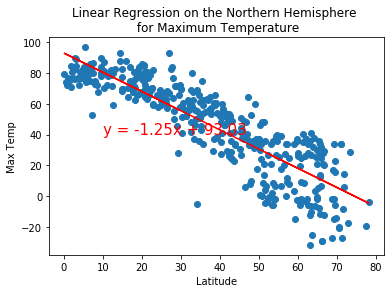

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

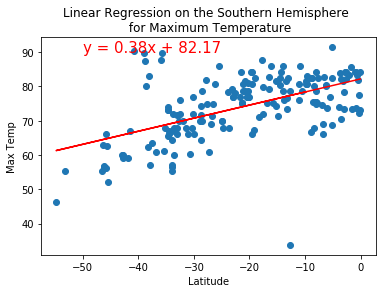

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

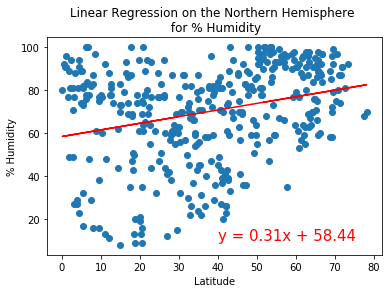

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

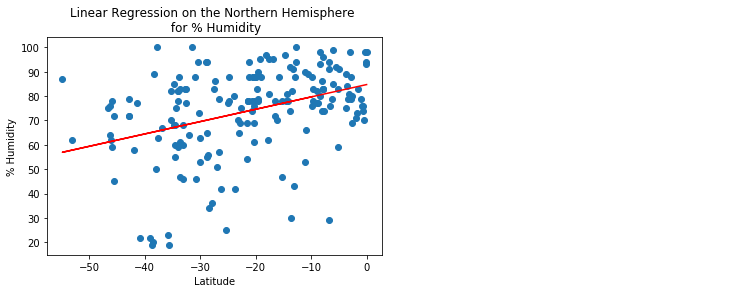

In [52]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

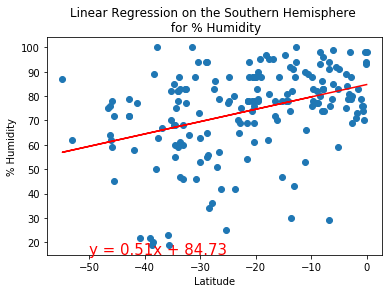

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

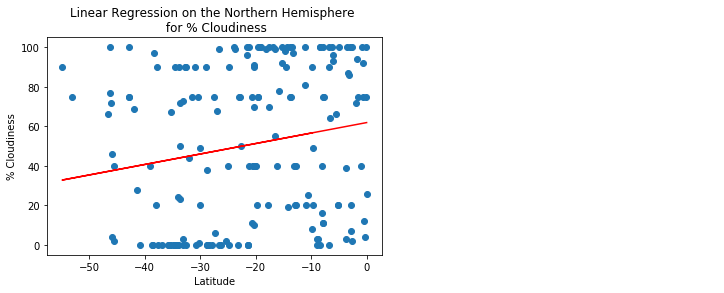

In [61]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

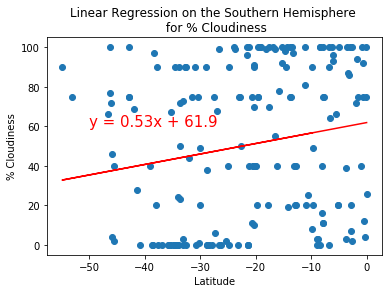

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

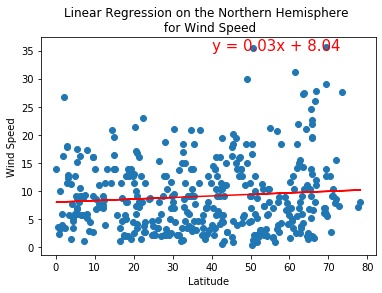

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

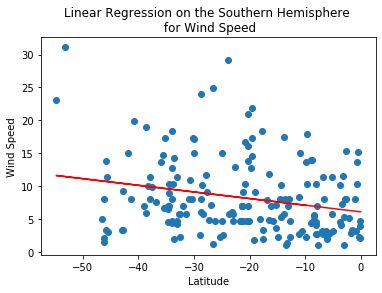

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))